Accuracy: 0.7605487063726342


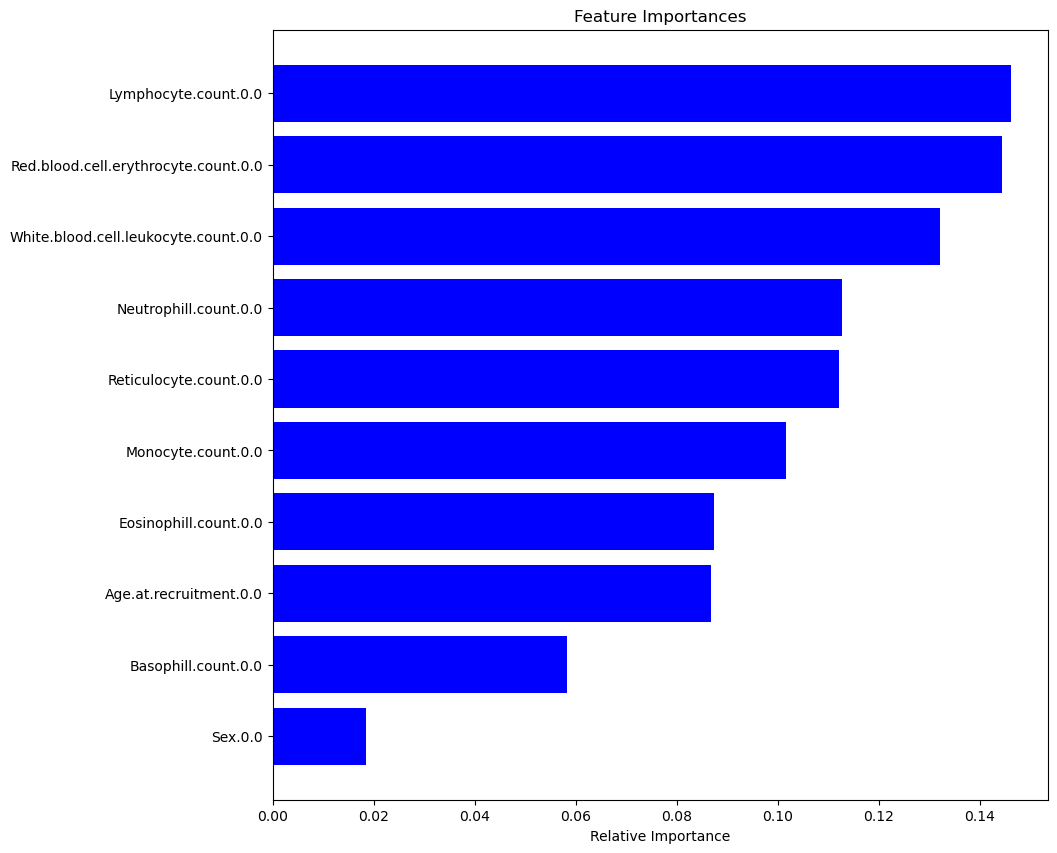

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier



data = pd.read_csv("/rds/general/user/hg1222/home/Group5/tidy_df.csv")
data.drop(columns=data.columns[0], axis=1, inplace=True)
X = data.drop('cancer', axis=1) # assuming the target column is called "outcome"
y = data['cancer']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the random forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=50)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print ('Accuracy:', accuracy)

# feature importance
features = X_train.columns
features
importances = rfc.feature_importances_
importances
indices = np.argsort(importances)
indices

plt.figure(figsize= (10,10))
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b',
         align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [2]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform nested cross-validation to evaluate the performance of the model for each combination of hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_rfc = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=50)
best_rfc.fit(X_train, y_train)
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)


Best hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy with best hyperparameters: 0.761764195172773
